# Visualising topic distributions

## Import and setup

### 1. Import libraries

In [1]:
import pickle

# Visualisation 
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

# Models
from hSBM.sbmtm import sbmtm
from top2vec.Top2Vec import Top2Vec


(ipykernel_launcher.py:15685): Gtk-WARNING **: 20:58:24.972: Locale not supported by C library.
	Using the fallback 'C' locale.


### 2. Import models

In [15]:
# Load hSBM model
hsbm_model = sbmtm()
hsbm_model.load_model('Models & outputs/hsbm_model')

# Load Top2Vec model
top2vec_model = pickle.load(open('Models & outputs/top2vec_model.pickle', 'rb'))

## Plot topic distributions 

In [16]:
top2vec_topic_labels = [
    "EU dependence on Russian gas",
    "Inclusion of nuclear and gas in the EU taxonomy",
    "Nuclear geopolitics: NATO vs Russia",
    "Greenwashing of nuclear and gas",
    "Germany’s opposition to nuclear energy",
    "Nuclear energy compared to other energy sources",
    "Nuclear disarmament of Iran (irrelevant)",
    "Deliberation on nuclear and gas as green investments",
    "Efficient sources of electricity in face of energy crisis",
    "Nuclear raw materials and radioactivity",
    "Attack on Zaporizhzhya nuclear power plant",
    "Controversy and criticism of green label for gas and nuclear",
    "German and Austrian opposition to taxonomy and their dispute with France",
    "Unfortunate timing of Germany closing its nuclear power plants",
    "Taxonomy revision as greenwashing",
    "Attempts to defend nuclear energy against environmentalist criticism",
    "Investment in nuclear stocks",
    "Carbon emission levels of different energy sources",
    "Sanctions against Russia and Belarus",
    "Nuclear reactor specifications and safety",
]

In [17]:
hsbm_topic_labels = [
    "Discussion of EU support of nuclear power",
    "Generic words",
    "Shutting down or opening of power plants in Europe",
    "Inclusion of nuclear and gas in the EU taxonomy",
    "Sustainability of nuclear power",
    "Reluctant turn to nuclear power, induced by industry actors, structural constraints etc.",
    "Member states’ involvement in taxonomy process",
    "Energy security, soaring electricity prices",
    "Attack on Zaporizhzhya nuclear power plant",
    "Russo-Ukrainian war in general",
    "German and Austrian opposition to nuclear energy",
    "Controversy around green label for gas and nuclear",
    "Nuclear disarmament of Iran (irrelevant)",
    "Building of new nuclear reactors, especially in Eastern Europe",
    "Emojis, particularly EU flags",
    "Large investments in nuclear power (including Elon Musk’s call for return to nuclear)",
    "EU sanctions against Russia",
    "Import of Russian fuel (nuclear and otherwise)",
    "EU dependence on Russian energy",
    "Nuclear research and investment",
    "Controversy over nuclear and gas as financially and environmentally sustainable",
    "Requirements for reactor types in different countries",
    "Investment in nuclear stocks",
    "Strain on EU energy grid",
    "Scientific breakthrough in nuclear fusion",
    "Pro-nuclear Australians discussing local legislation in light of the EU taxonomy",
]

In [18]:
# Obtain size of top 20 topics in Top2Vec
top2vec_topic_sizes, _ = top2vec_model.get_topic_sizes()[:20]

In [47]:
# Obtain topic prevalence from hSBM
level = 1
hsbm_topic_sums_sorted = sorted(
    hsbm_model.get_groups(l=level)['p_tw_d'].sum(axis=1),
    reverse=True
)

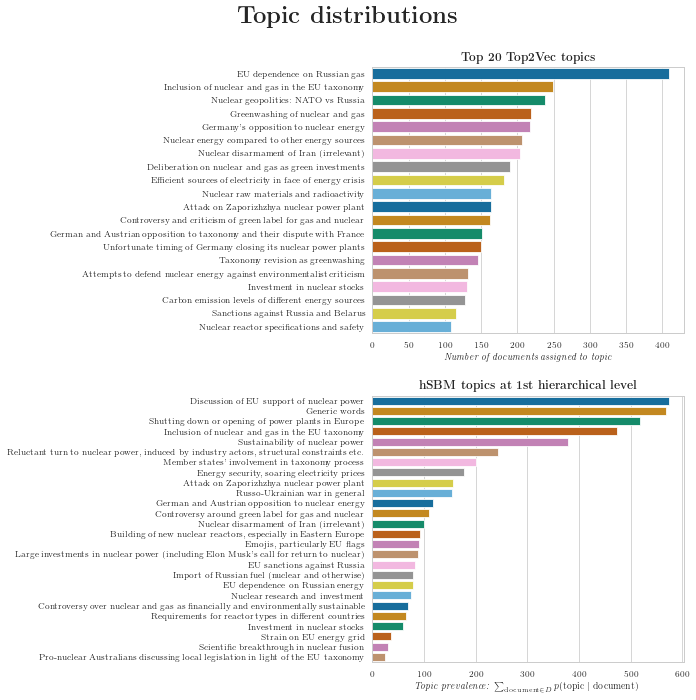

In [66]:
# Set plot style configurations
sns.set_style("whitegrid")
sns.set_context('paper')
rc('font', family='serif', size=18)
rc('text', usetex=True)

# Create figure
fig, [ax0, ax1] = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

# Plot Top2Vec topics
sns.barplot(y=top2vec_topic_labels,
            x=top2vec_topic_sizes,
            palette = 'colorblind',
            ax=ax0)
ax0.set_title(r'$\textbf{Top 20 Top2Vec topics}$', fontsize=12)
ax0.set_xlabel(r'$\textit{Number of documents assigned to topic}$')

# Plot hSBM topics
sns.barplot(y=hsbm_topic_labels,
            x=hsbm_topic_sums_sorted,
            palette = 'colorblind',
            ax=ax1)
ax1.set_title(r'$\textbf{hSBM topics at 1st hierarchical level}$', fontsize=12)
ax1.set_xlabel(r'$\textit{Topic prevalence: } \sum_{\mathrm{document}\in D}p(\mathrm{topic} \ | \ \mathrm{document})$')

# Final formatting
fig.suptitle(r'$\textbf{Topic distributions}$', fontsize=24)
fig.tight_layout()

# Save plot
plt.savefig('Models & outputs/topic_distributions.png', dpi=600)

# Show plot
plt.show()